**RNN psuedocode**

Wxh - input to hidden weight

Whh - hidden to hidden weight

bh - hidden bias

Wo - hidden to output weight

bo - output bias

X - T×D input matrix

tanh hidden activation

softmax output activation


Yhat = []

h_last = h0

for t in range(T):
    
    h_t = tanh(X[t].dot(Wx) + h_last.dot(Wh) + bh)
    
    yhat = softmax(h_t.dot(Wo) + bo)
    
    Yhat.append(yhat)

important, don’t forget to update h_last

h_last = h_t



**RNN CODE**


In [23]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

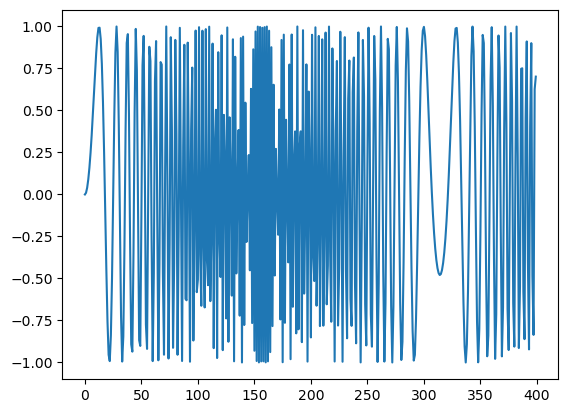

In [2]:
series2 = np.sin((0.1*np.arange(400))**2) # adding noise

plt.plot(series2)
plt.show()

In [8]:
T =10
D =1
X =[]
Y =[]

for t in range(len(series2)-T):
    x= series2[t:t+T]
    X.append(x)
    y = series2[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T) 
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)



X.shape (390, 10) Y.shape (390,)


In [9]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.01),
)

r2 = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.2513 - val_loss: 1.1791
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1279 - val_loss: 1.0606
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8891 - val_loss: 0.9561
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8557 - val_loss: 0.8764
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7941 - val_loss: 0.8132
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7908 - val_loss: 0.7592
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7277 - val_loss: 0.7091
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7066 - val_loss: 0.6679
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6190 - val_loss: 0.6393
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6410 - val_loss: 0.6128
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5876 - val_loss: 0.5864
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5849 - val_loss: 0.5705
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4839 - val_loss: 0.5924
Epoch 71/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4698 - val_loss: 0.5941
Epoch 72/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4960 - val_loss: 0.5998
Epoch 73/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5142 - val_loss: 0.6014
Epoch 74/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5042 - val_loss: 0.5979
Epoch 75/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4732 - val_loss: 0.5976
Epoch 76/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4959 - val_loss: 0.5999
Epoch 77/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4977 - val_loss: 0.5977
Epoch 78/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4959 - val_loss: 0.5999
Epoch 79/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4641 - val_loss: 0.5959
Epoch 80/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4982 - val_loss: 0.5933


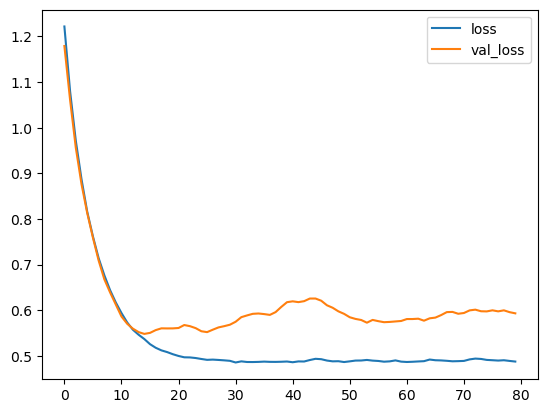

In [10]:
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label ='loss')
plt.plot(r2.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(390, 1)


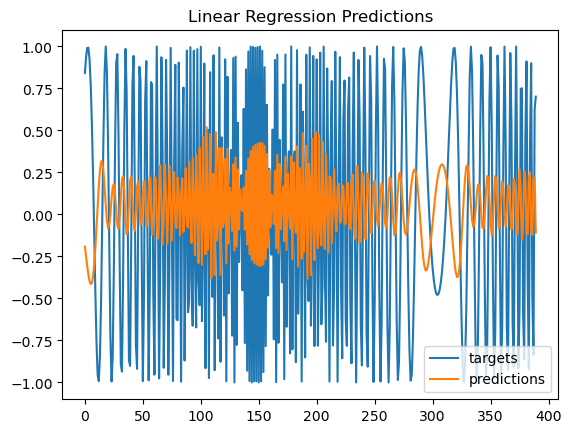

In [11]:
outputs = model.predict(X)

# Print the shape of the outputs
print(outputs.shape)

# Extract the first column of predictions
predictions = outputs[:, 0]

# Plot the true targets and predictions
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()


In [12]:
# INCORRECT WAY OF FORECASTING
validation_target_1 = Y[-N//2:]
validation_predictions_1 = []

i= -N//2

while len(validation_predictions_1)< len(validation_target_1):
    p1 = model.predict(X[i].reshape(1,-1))[0,0]
    i+=1
    
    validation_predictions_1.append(p1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

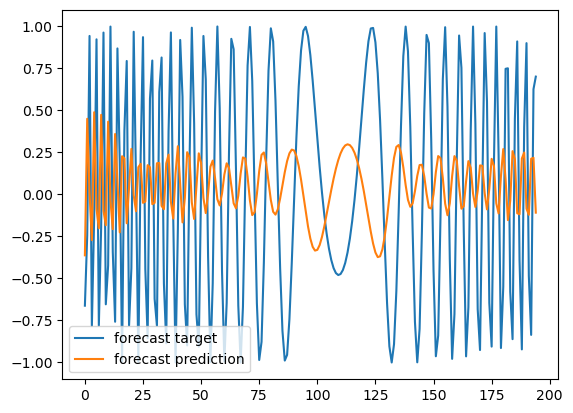

In [13]:

plt.plot(validation_target_1, label ='forecast target')
plt.plot(validation_predictions_1, label = 'forecast prediction')
plt.legend()

In [14]:
# CORRECT WAY OF FORECASTING
validation_target_2 = Y[-N//2:]
validation_predictions_2 = []

# last train input, from this we take predicted output as input
last_x = X[-N//2] # 1 D array of length T

while len(validation_predictions_2)< len(validation_target_2):
    p= model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions_2.append(p)
    
    # make the new input, updating input with predicted output
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

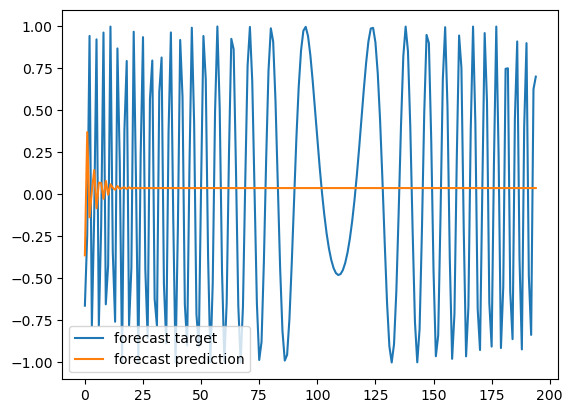

In [16]:
plt.plot(validation_target_2, label ='forecast target')
plt.plot(validation_predictions_2, label = 'forecast prediction')
plt.legend()

In [24]:
X = X.reshape(-1,T,1) # make it NxTxD

i = Input(shape=(T,D))
x = LSTM(10)(i) #defalut activation is tanh
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.05),
)

r2 = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs = 200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.5354 - val_loss: 0.6128
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4808 - val_loss: 0.6239
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4687 - val_loss: 0.5411
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4065 - val_loss: 0.5131
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3079 - val_loss: 0.3967
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2297 - val_loss: 0.3791
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1938 - val_loss: 0.4445
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2176 - val_loss: 0.2604
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1493 - val_loss: 0.2478
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1072 - val_loss: 0.1867
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0856 - val_loss: 0.1527
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0868 - val_lo

Epoch 70/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - val_loss: 0.1125
Epoch 71/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0029 - val_loss: 0.1054
Epoch 72/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - val_loss: 0.1078
Epoch 73/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0028 - val_loss: 0.1100
Epoch 74/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - val_loss: 0.1044
Epoch 75/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0032 - val_loss: 0.1117
Epoch 76/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.1033
Epoch 77/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031 - val_loss: 0.1100
Epoch 78/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - val_loss: 0.1045
Epoch 79/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - val_loss: 0.1056
Epoch 80/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025 - val_loss: 0.1034
Epoch 81/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - val_loss: 0.1150
Epoch 139/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.1106
Epoch 140/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050 - val_loss: 0.1115
Epoch 141/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 0.1039
Epoch 142/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 0.1032
Epoch 143/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.1016
Epoch 144/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.1037
Epoch 145/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.1142
Epoch 146/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023 - val_loss: 0.1114
Epoch 147/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017 - val_loss: 0.1073
Epoch 148/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0975
Epoch 149/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023 -

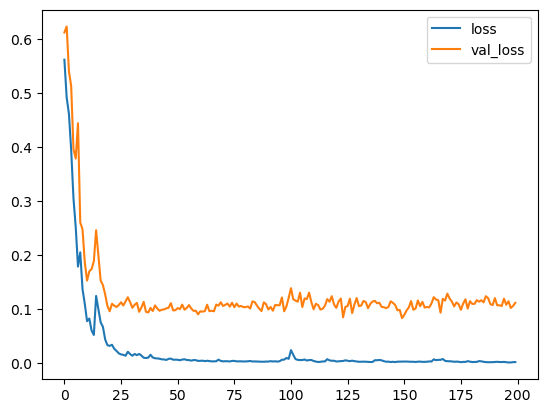

In [25]:

plt.plot(r2.history['loss'], label ='loss')
plt.plot(r2.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
(390, 1)


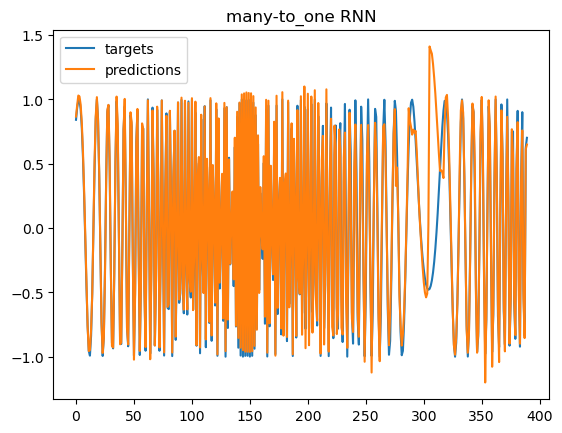

In [26]:
outputs = model.predict(X)

# Print the shape of the outputs
print(outputs.shape)

# Extract the first column of predictions
predictions = outputs[:, 0]

# Plot the true targets and predictions
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to_one RNN")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

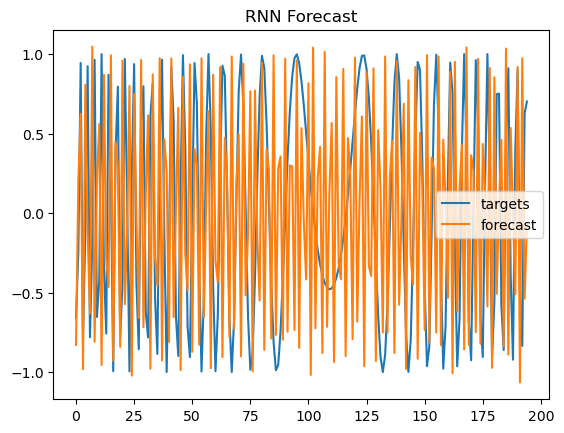

In [27]:
forecast = []

# Set the initial input to the last N//2 elements of X
input_ = X[-N//2]

# Iterate until the forecast length matches the remaining target length
while len(forecast) < len(Y[-N//2:]):
    # Reshape the input to NX TX D
    f = model.predict(input_.reshape(1, T, 1))[0, 0]

    # Append the forecast to the list
    forecast.append(f)

    # Make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f

# Plot the true targets and forecasts
plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()